In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')

for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')

for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [12]:
# Choose columns from Measurement class

select = [Measurement.date, Measurement.prcp]

# Define trip start and end dates as well as one-year look-back period based on trip start date

trip_start = dt.datetime(2015, 1, 1)
trip_end = dt.datetime(2015,1, 15)
one_year_ago_start = trip_start-dt.timedelta(days=365)
one_year_ago_end = trip_end-dt.timedelta(days=365)

# Design a query to retrieve the last 12 months of precipitation data and plot the results

trail_one_year_prcp = session.query(*select).filter(Measurement.date.between(one_year_ago_start, trip_start)).\
group_by(Measurement.date).all()

trail_one_year_prcp

[('2014-01-02', 0.0),
 ('2014-01-03', 0.76),
 ('2014-01-04', 0.0),
 ('2014-01-05', 0.0),
 ('2014-01-06', 0.0),
 ('2014-01-07', 0.0),
 ('2014-01-08', 0.0),
 ('2014-01-09', 0.03),
 ('2014-01-10', None),
 ('2014-01-11', None),
 ('2014-01-12', 0.35),
 ('2014-01-13', 0.0),
 ('2014-01-14', 0.43),
 ('2014-01-15', 0.01),
 ('2014-01-16', 0.25),
 ('2014-01-17', 0.0),
 ('2014-01-18', 0.0),
 ('2014-01-19', 0.0),
 ('2014-01-20', 0.0),
 ('2014-01-21', 0.0),
 ('2014-01-22', 0.35),
 ('2014-01-23', 0.0),
 ('2014-01-24', 0.0),
 ('2014-01-25', 0.0),
 ('2014-01-26', 0.0),
 ('2014-01-27', 0.14),
 ('2014-01-28', 0.02),
 ('2014-01-29', 0.27),
 ('2014-01-30', 0.04),
 ('2014-01-31', 0.0),
 ('2014-02-01', 0.22),
 ('2014-02-02', 0.38),
 ('2014-02-03', 0.0),
 ('2014-02-04', 0.5),
 ('2014-02-05', 0.23),
 ('2014-02-06', 0.08),
 ('2014-02-07', 0.03),
 ('2014-02-08', 0.0),
 ('2014-02-09', 0.0),
 ('2014-02-10', 0.0),
 ('2014-02-11', 0.0),
 ('2014-02-12', 0.0),
 ('2014-02-13', 0.0),
 ('2014-02-14', 0.0),
 ('2014-02-15'

In [13]:
# Turn trailing one-year precipitation data into DataFrame

df = pd.DataFrame(trail_one_year_prcp)
df.set_index('date',inplace=True)
df.head()

,prcp
date,
2014-01-02,0.00
2014-01-03,0.76
2014-01-04,0.00
2014-01-05,0.00
2014-01-06,0.00


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text xticklabel objects>)

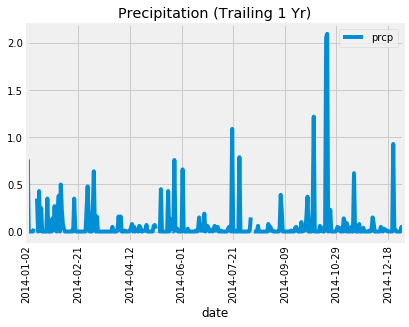

In [14]:
# Plot precipitation DataFrame

df.plot()

plt.title("Precipitation (Trailing 1 Yr)")
plt.xticks(rotation=90)

In [15]:
# Use Pandas to calcualte the summary statistics for the trailing one- year precipitation data

df.describe()

,prcp
count,358.000000
mean,0.065559
std,0.215044
min,0.000000
25%,0.000000
50%,0.000000
75%,0.030000
max,2.100000


In [16]:
# Design a query to show how many stations are available in this dataset?

session.query(func.count(Station.station)).all()

[(9)]

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

min_temp = session.query(Measurement.station, func.min(Measurement.tobs)).group_by(Measurement.station).all()
max_temp = session.query(Measurement.station, func.max(Measurement.tobs)).group_by(Measurement.station).all()
avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).group_by(Measurement.station).all()

min_temp_df = pd.DataFrame(np.array(min_temp).reshape(9,2), columns=["Station", "Min Temp"])
max_temp_df = pd.DataFrame(np.array(max_temp).reshape(9,2), columns=["Station", "Max Temp"])
avg_temp_df = pd.DataFrame(np.array(avg_temp).reshape(9,2), columns=["Station", "Avg Temp"])


min_temp_df = min_temp_df.set_index("Station")
max_temp_df = max_temp_df.set_index("Station")
avg_temp_df = avg_temp_df.set_index("Station")

temp_df = min_temp_df.merge(max_temp_df,on='Station').merge(avg_temp_df,on='Station')
temp_df

,Min Temp,Max Temp,Avg Temp
Station,,,
USC00511918,53.0,87.0,71.61596766043456
USC00513117,59.0,85.0,72.68918420081211
USC00514830,58.0,85.0,74.8732970027248
USC00516128,58.0,84.0,70.91500765696784
USC00517948,58.0,87.0,74.68440233236151
USC00518838,58.0,83.0,72.72407045009784
USC00519281,54.0,85.0,71.66378066378067
USC00519397,56.0,87.0,74.55323054331865
USC00519523,56.0,85.0,74.5436493068565


In [19]:
# Choose the station with the highest number of temperature observations.

tobs_count = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()

max_tobs_station = tobs_count[0][0]

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

max_tobs_station_temp = session.query(Measurement.tobs).filter(Measurement.station == max_tobs_station).\
filter(Measurement.date.between(one_year_ago_start, trip_start)).all()


max_tobs_station_temp

[(74.0),
 (66.0),
 (68.0),
 (62.0),
 (64.0),
 (68.0),
 (69.0),
 (61.0),
 (66.0),
 (66.0),
 (71.0),
 (65.0),
 (73.0),
 (62.0),
 (68.0),
 (66.0),
 (66.0),
 (67.0),
 (65.0),
 (71.0),
 (68.0),
 (58.0),
 (58.0),
 (73.0),
 (75.0),
 (66.0),
 (66.0),
 (67.0),
 (64.0),
 (65.0),
 (70.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (70.0),
 (68.0),
 (67.0),
 (72.0),
 (69.0),
 (62.0),
 (66.0),
 (66.0),
 (71.0),
 (71.0),
 (71.0),
 (73.0),
 (74.0),
 (72.0),
 (68.0),
 (68.0),
 (67.0),
 (71.0),
 (64.0),
 (64.0),
 (62.0),
 (63.0),
 (67.0),
 (70.0),
 (68.0),
 (62.0),
 (57.0),
 (61.0),
 (60.0),
 (71.0),
 (65.0),
 (69.0),
 (69.0),
 (66.0),
 (68.0),
 (71.0),
 (69.0),
 (67.0),
 (68.0),
 (65.0),
 (64.0),
 (69.0),
 (66.0),
 (71.0),
 (68.0),
 (72.0),
 (70.0),
 (70.0),
 (73.0),
 (70.0),
 (67.0),
 (73.0),
 (72.0),
 (71.0),
 (72.0),
 (71.0),
 (72.0),
 (71.0),
 (76.0),
 (76.0),
 (66.0),
 (73.0),
 (69.0),
 (66.0),
 (69.0),
 (71.0),
 (72.0),
 (70.0),
 (68.0),
 (71.0),
 (69.0),
 (74.0),
 (73.0),
 (73.0),
 (72.0),
 (71.0),
 

In [20]:
max_tobs_station_df = pd.DataFrame(max_tobs_station_temp)
max_tobs_station_df.head()

,tobs
0,74.0
1,66.0
2,68.0
3,62.0
4,64.0


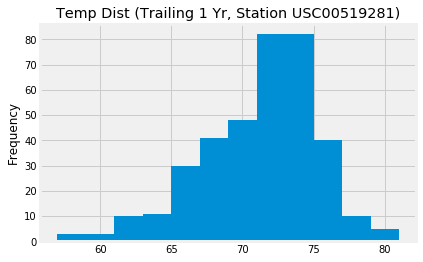

In [21]:
plt.hist(max_tobs_station_df["tobs"], bins=12)
plt.ylabel("Frequency")
plt.title("Temp Dist (Trailing 1 Yr, Station USC00519281)")
plt.show()

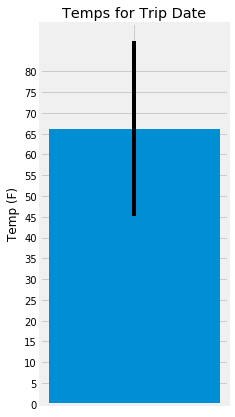

In [22]:
# TEMP ANALYSIS II

# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


def calc_temps(trip_start, trip_end):
    
    trip_start_end = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= trip_start,\
    Measurement.date <= trip_end).all()
    
    trip_df = pd.DataFrame(trip_start_end)
    
    max_temp = trip_df["tobs"].max()
    min_temp = trip_df["tobs"].min()
    avg_temp = trip_df["tobs"].mean()
    
    plt.figure(figsize=(3,7))
    plt.bar(1,avg_temp, yerr= max_temp - min_temp, tick_label="")
    plt.yticks(np.arange(0, max_temp+5, 5.0))
    plt.title("Temps for Trip Date")
    plt.ylabel("Temp (F)")
    plt.show()

calc_temps(trip_start, trip_end)

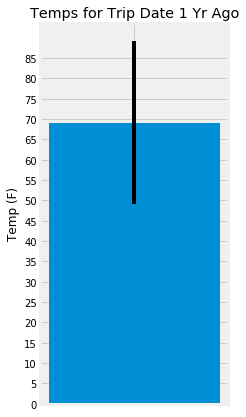

In [23]:
# TEMP ANALYSIS II

# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


def calc_temps(one_year_ago_start, one_year_ago_end):
    
    one_year_ago_trip_start_end = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_year_ago_start,\
    Measurement.date <= one_year_ago_end).all()
    
    one_year_ago_trip_df = pd.DataFrame(one_year_ago_trip_start_end)
    
    max_temp = one_year_ago_trip_df["tobs"].max()
    min_temp = one_year_ago_trip_df["tobs"].min()
    avg_temp = one_year_ago_trip_df["tobs"].mean()
    
    plt.figure(figsize=(3,7))
    plt.bar(1,avg_temp, yerr= max_temp - min_temp, tick_label="")
    plt.yticks(np.arange(0, max_temp+6, 5.0))
    plt.title("Temps for Trip Date 1 Yr Ago")
    plt.ylabel("Temp (F)")
    plt.show()


calc_temps(one_year_ago_start, one_year_ago_end)

In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

measurement_select = [Measurement.station, Measurement.prcp]

measurement_data = session.query(*measurement_select).\
filter(Measurement.date.between(one_year_ago_start, one_year_ago_end)).order_by(Measurement.prcp.desc()).\
group_by(Measurement.station).all()

station_select = [Station.station, Station.latitude, Station.longitude, Station.elevation]

station_data = session.query(*station_select).all()

In [25]:
# Turn rainfall per weather station during one-year-ago trip dates into DataFrame

measurement_data_df = pd.DataFrame(measurement_data)
station_data_df = pd.DataFrame(station_data)

station_data_df
measurement_data_df
measurement_station_df = pd.merge(measurement_data_df,station_data_df,on='station')

measurement_data_df['prcp'].fillna(0,inplace=True)
measurement_data_df

,station,prcp
0,USC00511918,0.30
1,USC00519523,0.15
2,USC00516128,0.04
3,USC00519281,0.01
4,USC00513117,0.00
5,USC00519397,0.00
6,USC00514830,0.00
7,USC00517948,0.00
8,USC00518838,0.00


## Optional Challenge Assignment

last_date = session.query(Measurement.date).order_by(Measurement.date).last()

In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [28]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [29]:
# Plot the daily normals as an area plot with `stacked=False`